In [84]:
import tensorflow as tf 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
weights_filepath = "/Users/alexandranava/Desktop/Spores/GerminationPrediction/initial_0_V4.h5"
model = tf.keras.models.load_model(weights_filepath)
print(model)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80)                27840     
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 27921 (109.07 KB)
Trainable params: 27921 (109.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


LSTM layers have 3 arrays: kernel weights, recurrent weights, and biases: 

Kernel weights shape: (input_dim, 4 * units) connects input features to LSTM units it includes weights for th einput, forget, cell, and output gates

recurrent weights shape: (units, 4 * units) weights for same four gates 

biases shape: (4 * units) 

Each LSTM unit has four gates that control the flow of information:

Input Gate: Controls the amount of new information added to the cell state.

Forget Gate: Controls the amount of information retained from the previous cell state.

Cell Gate: Updates the cell state with new information.

Output Gate: Controls the amount of information passed to the next hidden state.

In [86]:
for i, weight in enumerate(weights):
    print(f"Weight {i + 1}:")
    print(weight)
    print(f"Shape: {weight.shape}\n")


Weight 1:
[[-1.02207907e-01 -1.03931807e-01 -1.32906944e-01 ...  5.37420772e-02
   2.82615349e-02 -1.56858787e-02]
 [ 4.37906645e-02 -3.14239934e-02  6.51044771e-02 ...  1.58531573e-02
  -4.43265662e-02 -4.81827594e-02]
 [ 1.20966993e-01  1.24992415e-01  1.18339919e-01 ...  1.10037923e-01
   9.73280519e-02 -8.58891487e-01]
 [-9.07801762e-02 -2.92079337e-02 -5.30174235e-04 ...  9.75093693e-02
  -7.44219944e-02  8.13064426e-02]
 [-1.53854698e-01 -2.45004855e-02 -1.24482512e-01 ...  1.03033446e-01
  -5.82612306e-02  1.82649255e-01]
 [ 4.65052366e-01 -4.51901481e-02 -9.80754793e-02 ...  1.34443507e-01
  -7.86393881e-02 -4.68314934e+00]]
Shape: (6, 320)

Weight 2:
[[ 1.19432785e-01 -2.32694503e-02  3.97898257e-02 ...  5.76007217e-02
   8.34525675e-02 -2.20893428e-01]
 [ 2.23530792e-02  5.44805527e-02  2.01279279e-02 ... -7.68003687e-02
   5.91813494e-03 -8.34221691e-02]
 [ 8.47620592e-02 -1.74922533e-02  8.70653391e-02 ... -6.87065497e-02
  -7.22417608e-02  4.67029549e-02]
 ...
 [-2.7653250

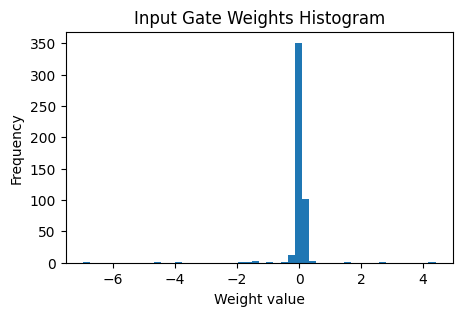

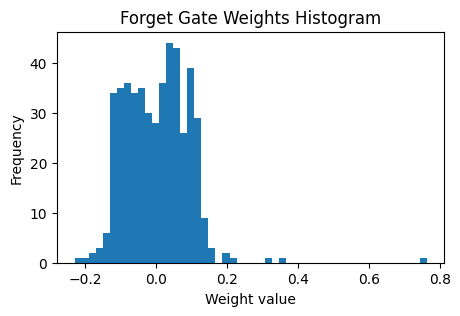

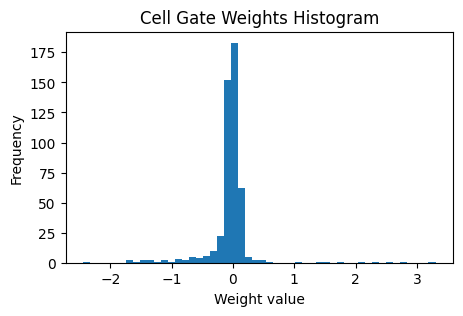

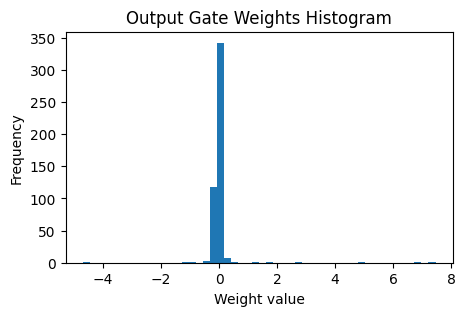

In [87]:
lstm_layer = model.get_layer('lstm')
weights = lstm_layer.get_weights()

# Assuming input_dim and units are known
input_dim = weights[0].shape[0]
units = lstm_layer.units

# Separate weights for each gate
input_weights = weights[0]
recurrent_weights = weights[1]
biases = weights[2]

input_gate_weights = input_weights[:, :units]
forget_gate_weights = input_weights[:, units:units*2]
cell_gate_weights = input_weights[:, units*2:units*3]
output_gate_weights = input_weights[:, units*3:]

# Plot histograms for each gate
def plot_gate_weight_histogram(gate_weights, title):
    plt.figure(figsize=(5, 3))
    plt.hist(gate_weights.flatten(), bins=50)
    plt.title(title)
    plt.xlabel('Weight value')
    plt.ylabel('Frequency')
    plt.show()

plot_gate_weight_histogram(input_gate_weights, 'Input Gate Weights Histogram')
plot_gate_weight_histogram(forget_gate_weights, 'Forget Gate Weights Histogram')
plot_gate_weight_histogram(cell_gate_weights, 'Cell Gate Weights Histogram')
plot_gate_weight_histogram(output_gate_weights, 'Output Gate Weights Histogram')


Input Weights Shape: (6, 320)
Recurrent Weights Shape: (80, 320)
Biases Shape: (320,)
Input Weights (Input Gate) Shape: (6, 80)
Input Weights (Forget Gate) Shape: (6, 80)
Input Weights (Cell Gate) Shape: (6, 80)
Input Weights (Output Gate) Shape: (6, 80)
Recurrent Weights (Input Gate) Shape: (80, 80)
Recurrent Weights (Forget Gate) Shape: (80, 80)
Recurrent Weights (Cell Gate) Shape: (80, 80)
Recurrent Weights (Output Gate) Shape: (80, 80)
Biases (Input Gate) Shape: (80,)
Biases (Forget Gate) Shape: (80,)
Biases (Cell Gate) Shape: (80,)
Biases (Output Gate) Shape: (80,)


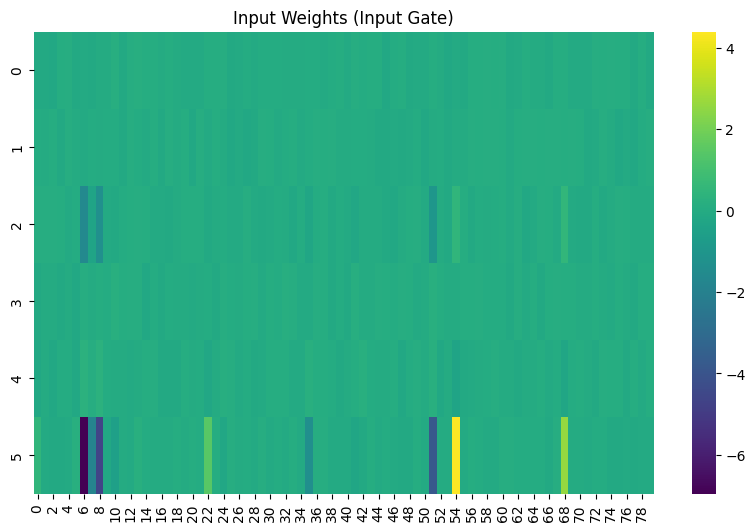

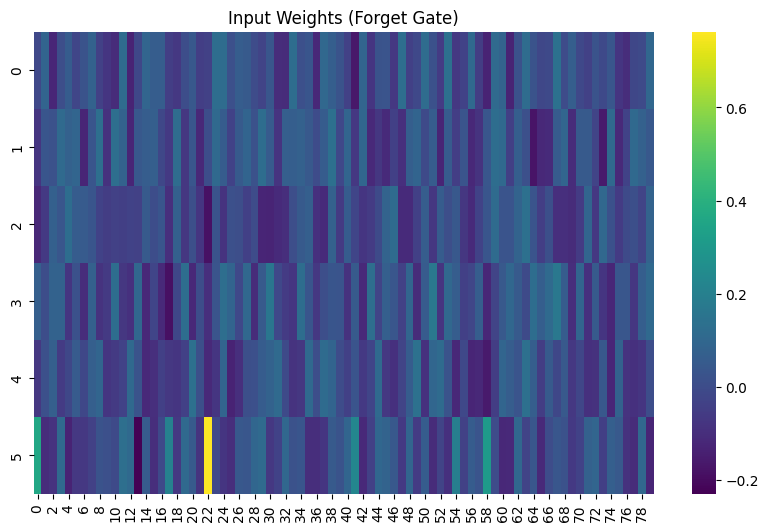

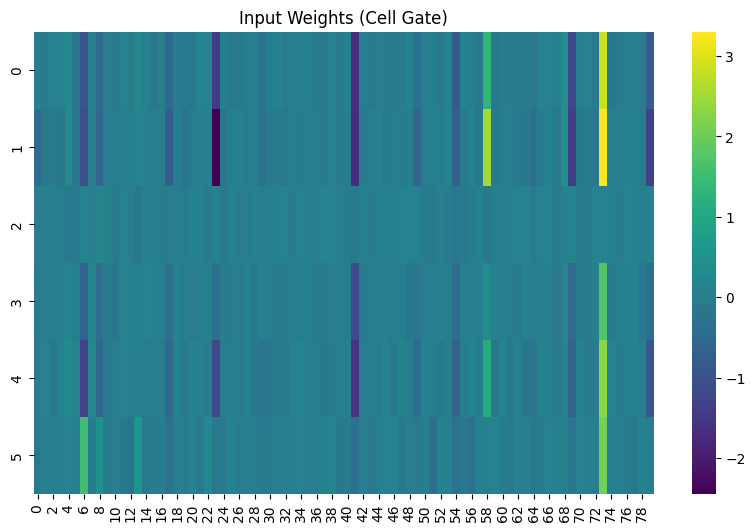

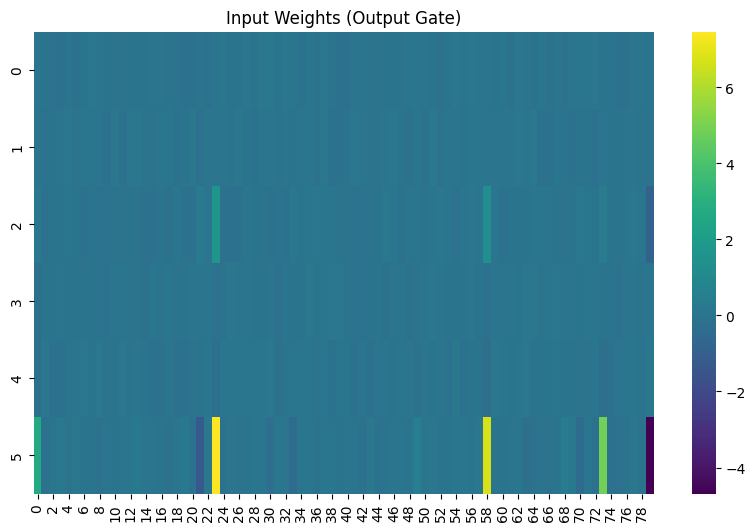

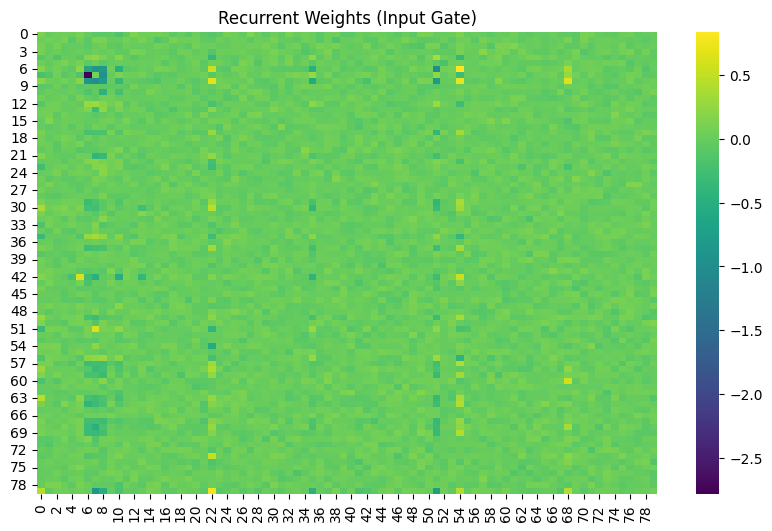

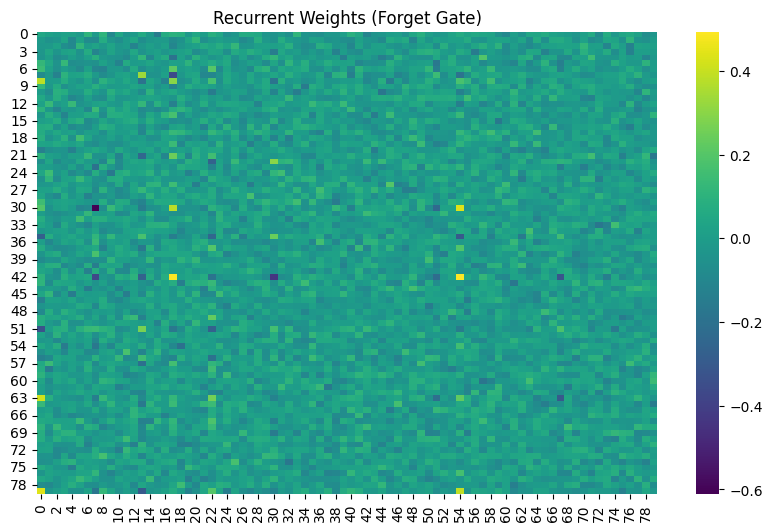

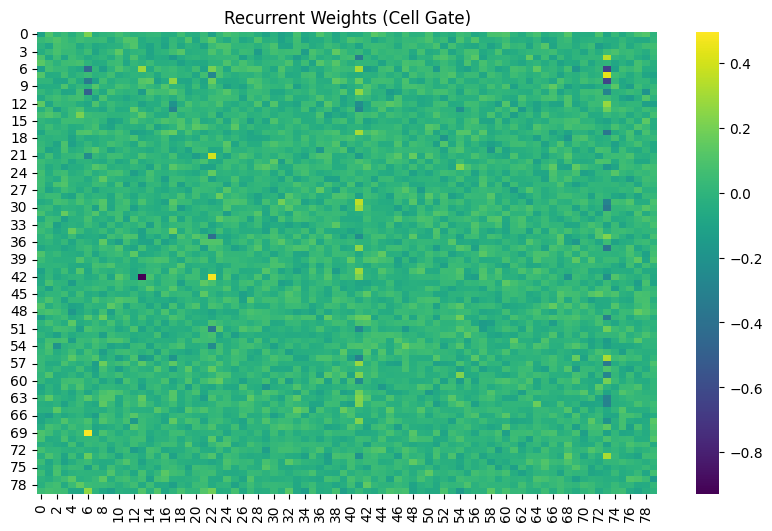

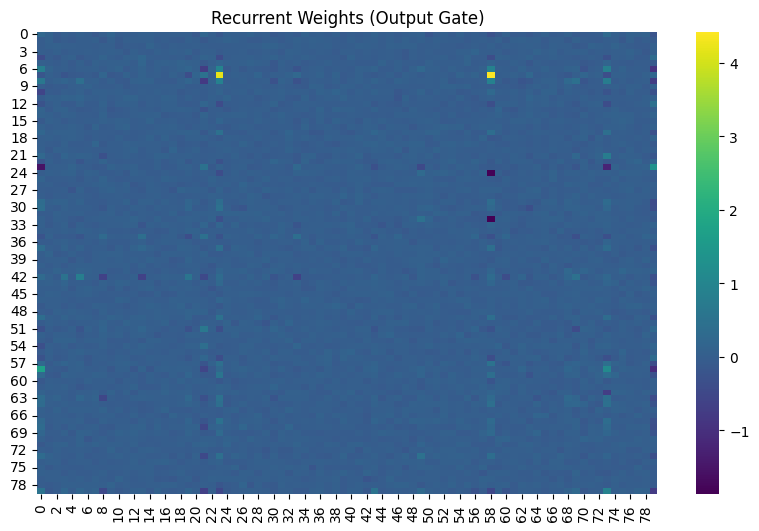

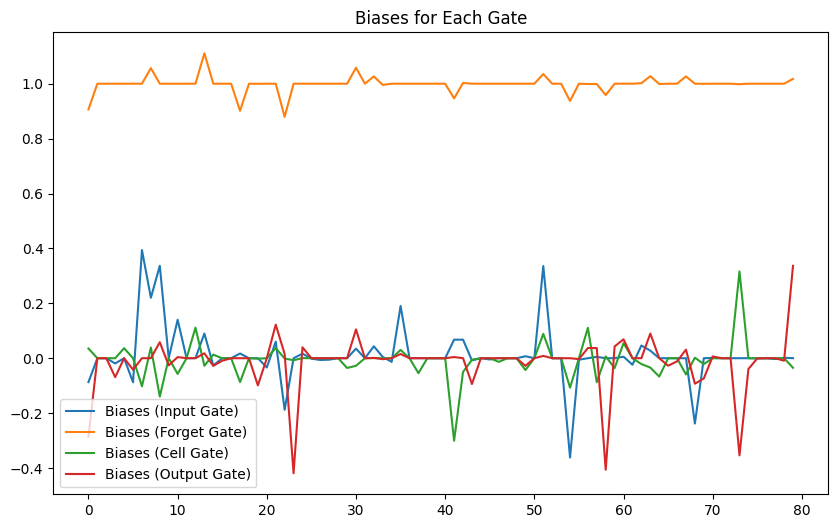